In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Week 2 Coding Tasks

### Hospice data

In [3]:
hospice_df = pd.read_csv('data/Hospice_General_Information.csv')
hospice_df.head(2)

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,PhoneNumber,CMS Region,Ownership Type,Certification Date
0,11500,BAPTIST HOSPICE,301 INTERSTATE PARK,NaN,MONTGOMERY,AL,36109,Montgomery,(334) 395-5000,4,Other,03/23/1984
1,11501,SOUTHERNCARE NEW BEACON N. BIRMINGHAM,"4735 NORREL DRIVE, SUITE 129",NaN,TRUSSVILLE,AL,35173,Jefferson,(205) 939-8799,4,For-Profit,05/24/1984


#### Keep just the TN hospice facilities

In [4]:
hospice_df = hospice_df.loc[hospice_df.State == 'TN']
hospice_df.head(2)

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,PhoneNumber,CMS Region,Ownership Type,Certification Date
2889,441501,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NaN,NASHVILLE,TN,37203,Davidson,(615) 327-1085,4,Non-Profit,04/10/1984
2890,441502,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",NaN,MEMPHIS,TN,38134,Shelby,(901) 516-1600,4,Non-Profit,08/31/1984


#### Keep just these columns:  facility name, address, city, state, zip, county, region, owner type, and cert date

In [5]:
# Facility Name, Address Line 1, City, State, County Name, CMS Region, Ownership Type, and Cerfification Date
hospice_df.columns = ['ccn', 'facility', 'address', 'address2', 'city',
                      'state', 'zip', 'county', 'phone', 'region', 'owner_type', 'cert_date' ]
hospice_df.head(2)

,ccn,facility,address,address2,city,state,zip,county,phone,region,owner_type,cert_date
2889,441501,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NaN,NASHVILLE,TN,37203,Davidson,(615) 327-1085,4,Non-Profit,04/10/1984
2890,441502,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",NaN,MEMPHIS,TN,38134,Shelby,(901) 516-1600,4,Non-Profit,08/31/1984


In [6]:
hospice_df.drop(columns = ['ccn', 'address2', 'zip', 'phone' ], inplace = True)
hospice_df.head(2)

,facility,address,city,state,county,region,owner_type,cert_date
2889,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NASHVILLE,TN,Davidson,4,Non-Profit,04/10/1984
2890,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",MEMPHIS,TN,Shelby,4,Non-Profit,08/31/1984


In [7]:
print('top: ', hospice_df.head(2))
print('--------------------------')
print('bottom: ', hospice_df.tail(2))

top:                          facility                            address  \
2889           ALIVE HOSPICE INC                1718 PATTERSON ROAD   
2890  METHODIST ALLIANCE HOSPICE  6400 SHELBY VIEW DRIVE, SUITE 101   

           city state    county  region  owner_type   cert_date  
2889  NASHVILLE    TN  Davidson       4  Non-Profit  04/10/1984  
2890    MEMPHIS    TN    Shelby       4  Non-Profit  08/31/1984  
--------------------------
bottom:                                    facility                  address  \
2943  AMEDISYS HOSPICE, AN ADVENTA COMPANY        400 ROYAL PARKWAY   
2944                       KINDRED HOSPICE  430 STUART RD NE, STE 2   

           city state    county  region  owner_type   cert_date  
2943  NASHVILLE    TN  Davidson       4       Other  01/05/2016  
2944  CLEVELAND    TN   Bradley       4  For-Profit  01/04/2017  


In [8]:
# print the dimensions of the data
hospice_df.shape

(56, 8)

### Cancer data

In [9]:
cancer_df = pd.read_csv('data/cancer_deaths.csv', skiprows=4, nrows = 97)
cancer_df.head()

,County,FIPS,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,-1.2
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,-1.5
2,Trousdale County,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,1.3
3,Scott County,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,0.1
4,Cheatham County,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,0.3


In [10]:
cancer_df.columns = ['county', 'fips', 'healthy_people', 'death_rate_per_100K', 
                  'lower_95_ci', 'upper_95_ci', 'avg_annual_count', 'recent_5year_trend', 
                  'recent_trend', 'trend_lower_95_ci', 'trend_upper_95_ci']

In [11]:
cancer_df.shape

(97, 11)

### Population data

In [12]:
pop_df = pd.read_csv('data/PEP_2017_PEPAGESEX.csv', skiprows = 1)
pop_df.head(3)

,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; Total","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",Population Estimate (as of July 1) - 2010 - Both Sexes; Total,...,Population Estimate (as of July 1) - 2014 - Females; Median age (years),Population Estimate (as of July 1) - 2015 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2015 - Male; Median age (years),Population Estimate (as of July 1) - 2015 - Female; Median age (years),Population Estimate (as of July 1) - 2016 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2016 - Male; Median age (years),Population Estimate (as of July 1) - 2016 - Female; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Male; Median age (years),Population Estimate (as of July 1) - 2017 - Female; Median age (years)
0,0500000US47001,47001,"Anderson County, Tennessee",75129,36308,38821,75094,36288,38806,75112,...,44.8,43.3,41.4,44.8,43.3,41.5,45.1,43.2,41.2,45.0
1,0500000US47003,47003,"Bedford County, Tennessee",45058,22357,22701,45056,22356,22700,45086,...,38.4,37.2,35.9,38.5,37.5,36.2,38.8,37.5,36.2,38.9
2,0500000US47005,47005,"Benton County, Tennessee",16489,8073,8416,16491,8074,8417,16511,...,48.3,46.6,45.2,48.0,47.1,45.7,48.4,47.4,46.0,48.7


In [13]:
pop_df.shape

(95, 993)

In [14]:
list(pop_df.columns)


['Id',
 'Id2',
 'Geography',
 'April 1, 2010 - Census - Both Sexes; Total',
 'April 1, 2010 - Census - Male; Total',
 'April 1, 2010 - Census - Female; Total',
 'April 1, 2010 - Estimates Base - Both Sexes; Total',
 'April 1, 2010 - Estimates Base - Male; Total',
 'April 1, 2010 - Estimates Base - Female; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Male; Total',
 'Population Estimate (as of July 1) - 2010 - Female; Total',
 'Population Estimate (as of July 1) - 2011 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2011 - Male; Total',
 'Population Estimate (as of July 1) - 2011 - Female; Total',
 'Population Estimate (as of July 1) - 2012 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2012 - Male; Total',
 'Population Estimate (as of July 1) - 2012 - Female; Total',
 'Population Estimate (as of July 1) - 2013 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2013 - Male; Tot

### Week 3 Coding Tasks

#### Drop the April estimates - we'll work with July data for each year

In [15]:
april_data = [col for col in pop_df.columns if col.startswith('April')]
pop_df = pop_df.drop(april_data, axis = 1)

In [16]:
pop_df.shape

(95, 795)

In [17]:
# keep only 2010, 2014, 2017 data that is not gender specific
cols2010 = [col for col in pop_df.columns if (col.find('2010') != -1)]
cols2010 = [col for col in cols2010 if (col.find('Both') != -1)]
cols2014 = [col for col in pop_df.columns if (col.find('2014') != -1)]
cols2014 = [col for col in cols2014 if (col.find('Both') != -1)]
cols2017 = [col for col in pop_df.columns if (col.find('2017') != -1)]
cols2017 = [col for col in cols2017 if (col.find('Both') != -1)]

# create list of columns to keep
keep = ['Geography']
keep = keep + cols2010 + cols2014 + cols2017

# create a list of columns to drop and drop them
drop = [col for col in pop_df.columns if col not in keep]
pop_df = pop_df.drop(drop, axis = 1)


# rename columns; use throwaway names for columns we don't care about
#print(list(pop_df.columns))
pop_df.columns = ['county', 'pop2010all', 'pop2014all', 'pop2017all', 'pop2010_under5',
                 'pop2014_under5', 'pop2017_under5', 'pop2010_5to9', 'pop2014_5to9',
                 'pop2017_5to9', 'pop2010_10to14', 'pop2014_10to14',
                 'pop2017_10to14', 'pop2010_15to19', 'pop2014_15to19', 'pop2017_15to19',
                 'pop2010_20to24', 'pop2014_20to24', 'pop2017_20to24', 'pop2010_25to29',
                 'pop2014_25to29', 'pop2017_25to29', 'pop2010_30to34', 'pop2014_30to34',
                 'pop2017_30to34', 'pop2010_35to39', 'pop2014_35to39', 'pop2017_35to39',
                 'pop2010_40to44', 'pop2014_40to44', 'pop2017_40to44', 'pop2010_45to49',
                 'pop2014_45to49', 'pop2017_45to49', 'pop2010_50to54', 'pop2014_50to54',
                 'pop2017_50to54', 'pop2010_55to59', 'pop2014_55to59', 'pop2017_55to59',
                 'pop2010_60to64', 'pop2014_60to64', 'pop2017_60to64', 'pop2010_65to69',
                 'pop2014_65to69', 'pop2017_65to69', 'pop2010_70to74', 'pop2014_70to74',
                 'pop2017_70to74', 'pop2010_75to79', 'pop2014_75to79', 'pop2017_75to79',
                 'pop2010_80to84', 'pop2014_80to84', 'pop2017_80to84', 'pop2010_85over',
                 'pop2014_85over', 'pop2017_85over', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
                 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
                 'w', 'x', 'aa', 'bb', 'cc', 'dd', 'ee', 'ff', 'gg', 'hh', 'ii', 'jj', 'kk',
                 'll', 'mm', 'nn', 'oo', 'median_age_2010', 'median_age_2014',
                 'median_age_2017']

# drop the throwaway columns
pop_df = pop_df.drop(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
                     'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'aa', 'bb', 'cc',
                     'dd', 'ee', 'ff', 'gg', 'hh', 'ii', 'jj', 'kk', 'll', 'mm', 'nn', 'oo'],
                    axis = 1)

# cleanup - drop columns for under 50
pop_df = pop_df.drop(['pop2010_under5',
       'pop2014_under5', 'pop2017_under5', 'pop2010_5to9', 'pop2014_5to9',
       'pop2017_5to9', 'pop2010_10to14', 'pop2014_10to14', 'pop2017_10to14',
       'pop2010_15to19', 'pop2014_15to19', 'pop2017_15to19', 'pop2010_20to24',
       'pop2014_20to24', 'pop2017_20to24', 'pop2010_25to29', 'pop2014_25to29',
       'pop2017_25to29', 'pop2010_30to34', 'pop2014_30to34', 'pop2017_30to34',
       'pop2010_35to39', 'pop2014_35to39', 'pop2017_35to39', 'pop2010_40to44',
       'pop2014_40to44', 'pop2017_40to44', 'pop2010_45to49', 'pop2014_45to49',
       'pop2017_45to49'], axis = 1)

In [18]:
print(pop_df.shape)
print(pop_df.columns)

(95, 31)
Index(['county', 'pop2010all', 'pop2014all', 'pop2017all', 'pop2010_50to54',
       'pop2014_50to54', 'pop2017_50to54', 'pop2010_55to59', 'pop2014_55to59',
       'pop2017_55to59', 'pop2010_60to64', 'pop2014_60to64', 'pop2017_60to64',
       'pop2010_65to69', 'pop2014_65to69', 'pop2017_65to69', 'pop2010_70to74',
       'pop2014_70to74', 'pop2017_70to74', 'pop2010_75to79', 'pop2014_75to79',
       'pop2017_75to79', 'pop2010_80to84', 'pop2014_80to84', 'pop2017_80to84',
       'pop2010_85over', 'pop2014_85over', 'pop2017_85over', 'median_age_2010',
       'median_age_2014', 'median_age_2017'],
      dtype='object')


In [19]:
pop_df.head(2)

,county,pop2010all,pop2014all,pop2017all,pop2010_50to54,pop2014_50to54,pop2017_50to54,pop2010_55to59,pop2014_55to59,pop2017_55to59,...,pop2017_75to79,pop2010_80to84,pop2014_80to84,pop2017_80to84,pop2010_85over,pop2014_85over,pop2017_85over,median_age_2010,median_age_2014,median_age_2017
0,"Anderson County, Tennessee",75112,75131,76257,5850,5690,5296,5577,5689,5643,...,2501,1969,1779,1785,2135,2211,2173,42.6,43.3,43.2
1,"Bedford County, Tennessee",45086,46259,48117,3043,3207,3239,2646,2938,3143,...,1321,756,729,811,647,679,640,36.5,37.2,37.5


In [20]:
# remove state from pop_df.county
pop_df.county = pop_df.county.str.replace(', Tennessee', '')
pop_df.head(2)

,county,pop2010all,pop2014all,pop2017all,pop2010_50to54,pop2014_50to54,pop2017_50to54,pop2010_55to59,pop2014_55to59,pop2017_55to59,...,pop2017_75to79,pop2010_80to84,pop2014_80to84,pop2017_80to84,pop2010_85over,pop2014_85over,pop2017_85over,median_age_2010,median_age_2014,median_age_2017
0,Anderson County,75112,75131,76257,5850,5690,5296,5577,5689,5643,...,2501,1969,1779,1785,2135,2211,2173,42.6,43.3,43.2
1,Bedford County,45086,46259,48117,3043,3207,3239,2646,2938,3143,...,1321,756,729,811,647,679,640,36.5,37.2,37.5


### merge pop_df and cancer_df

In [21]:
cancer_df.head()

,county,fips,healthy_people,death_rate_per_100K,lower_95_ci,upper_95_ci,avg_annual_count,recent_5year_trend,recent_trend,trend_lower_95_ci,trend_upper_95_ci
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,-1.2
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,-1.5
2,Trousdale County,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,1.3
3,Scott County,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,0.1
4,Cheatham County,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,0.3


In [22]:
pop_and_cancer = pd.merge(pop_df, cancer_df, on = 'county', how = 'outer')
pop_and_cancer.head(2)

,county,pop2010all,pop2014all,pop2017all,pop2010_50to54,pop2014_50to54,pop2017_50to54,pop2010_55to59,pop2014_55to59,pop2017_55to59,...,fips,healthy_people,death_rate_per_100K,lower_95_ci,upper_95_ci,avg_annual_count,recent_5year_trend,recent_trend,trend_lower_95_ci,trend_upper_95_ci
0,Anderson County,75112.0,75131.0,76257.0,5850.0,5690.0,5296.0,5577.0,5689.0,5643.0,...,47001,No,180.6,169.1,192.7,195,falling,-0.7,-1.2,-0.2
1,Bedford County,45086.0,46259.0,48117.0,3043.0,3207.0,3239.0,2646.0,2938.0,3143.0,...,47003,No,182.7,166.1,200.6,92,falling,-0.7,-1.4,-0.1


### Drop ' County' from the county column

In [23]:
pop_and_cancer.county = pop_and_cancer.county.str.replace(' County', '')

### Create hospice_per_county dictionary

In [24]:
hospice_per_county = hospice_df.county.value_counts().to_dict()

In [25]:
hospice_per_county

{'Davidson': 8,
 'Shelby': 5,
 'Knox': 5,
 'Hamilton': 5,
 'Bradley': 2,
 'Carroll': 2,
 'Robertson': 2,
 'Williamson': 2,
 'Washington': 2,
 'Madison': 2,
 'Coffee': 1,
 'Blount': 1,
 'Fentress': 1,
 'Hancock': 1,
 'Rutherford': 1,
 'Carter': 1,
 'Wayne': 1,
 'Sumner': 1,
 'Lincoln': 1,
 'McMinn': 1,
 'Sullivan': 1,
 'Henry': 1,
 'Perry': 1,
 'Claiborne': 1,
 'Obion': 1,
 'Cocke': 1,
 'Fayette': 1,
 'Cumberland': 1,
 'Putnam': 1,
 'Hamblen': 1,
 'Montgomery': 1}

### Add counties that have 0 hospice facilities

In [26]:
for county in pop_and_cancer.county:
    if county in hospice_per_county:
        continue
    else:
        hospice_per_county[county] = 0

#check for Anderson in the dictionary      
hospice_per_county['Anderson']

0

In [27]:
pop_and_cancer['hospice_count'] = [hospice_per_county[county] for county in pop_and_cancer.county]
pop_and_cancer.head(2)

,county,pop2010all,pop2014all,pop2017all,pop2010_50to54,pop2014_50to54,pop2017_50to54,pop2010_55to59,pop2014_55to59,pop2017_55to59,...,healthy_people,death_rate_per_100K,lower_95_ci,upper_95_ci,avg_annual_count,recent_5year_trend,recent_trend,trend_lower_95_ci,trend_upper_95_ci,hospice_count
0,Anderson,75112.0,75131.0,76257.0,5850.0,5690.0,5296.0,5577.0,5689.0,5643.0,...,No,180.6,169.1,192.7,195,falling,-0.7,-1.2,-0.2,0
1,Bedford,45086.0,46259.0,48117.0,3043.0,3207.0,3239.0,2646.0,2938.0,3143.0,...,No,182.7,166.1,200.6,92,falling,-0.7,-1.4,-0.1,0


### Week 4 Coding Tasks

In [28]:
pop_and_cancer.isnull().sum()

county                 0
pop2010all             2
pop2014all             2
pop2017all             2
pop2010_50to54         2
pop2014_50to54         2
pop2017_50to54         2
pop2010_55to59         2
pop2014_55to59         2
pop2017_55to59         2
pop2010_60to64         2
pop2014_60to64         2
pop2017_60to64         2
pop2010_65to69         2
pop2014_65to69         2
pop2017_65to69         2
pop2010_70to74         2
pop2014_70to74         2
pop2017_70to74         2
pop2010_75to79         2
pop2014_75to79         2
pop2017_75to79         2
pop2010_80to84         2
pop2014_80to84         2
pop2017_80to84         2
pop2010_85over         2
pop2014_85over         2
pop2017_85over         2
median_age_2010        2
median_age_2014        2
median_age_2017        2
fips                   0
healthy_people         0
death_rate_per_100K    0
lower_95_ci            0
upper_95_ci            0
avg_annual_count       0
recent_5year_trend     0
recent_trend           0
trend_lower_95_ci      0


In [29]:
pop_and_cancer.loc[pop_and_cancer.median_age_2017.isnull()]


,county,pop2010all,pop2014all,pop2017all,pop2010_50to54,pop2014_50to54,pop2017_50to54,pop2010_55to59,pop2014_55to59,pop2017_55to59,...,healthy_people,death_rate_per_100K,lower_95_ci,upper_95_ci,avg_annual_count,recent_5year_trend,recent_trend,trend_lower_95_ci,trend_upper_95_ci,hospice_count
95,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,-1.2,0
96,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,-1.5,0


#### Save the national and statewide data to a separate df before dropping them from `pop_and_cancer`

In [35]:
tn_and_us = pop_and_cancer.loc[pop_and_cancer.median_age_2017.isnull()]

In [36]:
pop_and_cancer = pop_and_cancer.loc[~pop_and_cancer.county.isin(['Tennessee', 'United States'])]

In [37]:
pop_and_cancer.death_rate_per_100K.mean()

195.8726315789474

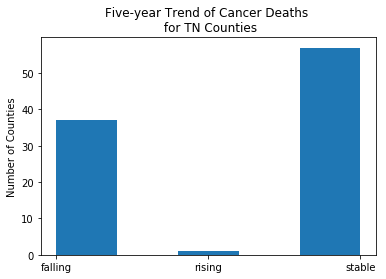

In [45]:
plt.hist(pop_and_cancer.recent_5year_trend, bins = 5)
plt.title('Five-year Trend of Cancer Deaths \n for TN Counties')
plt.ylabel('Number of Counties')
plt.show()

#### Counties with more than 2 hospice facilities

In [46]:
pop_and_cancer.loc[pop_and_cancer.hospice_count > 2]

,county,pop2010all,pop2014all,pop2017all,pop2010_50to54,pop2014_50to54,pop2017_50to54,pop2010_55to59,pop2014_55to59,pop2017_55to59,...,healthy_people,death_rate_per_100K,lower_95_ci,upper_95_ci,avg_annual_count,recent_5year_trend,recent_trend,trend_lower_95_ci,trend_upper_95_ci,hospice_count
18,Davidson,627973.0,670314.0,691243.0,42340.0,43565.0,40889.0,37772.0,41623.0,41751.0,...,No,184.7,179.8,189.7,1137,falling,-1.5,-1.7,-1.2,8
32,Hamilton,337262.0,350602.0,361613.0,25237.0,24725.0,23736.0,23644.0,24948.0,24791.0,...,No,172.6,167.0,178.3,743,stable,0.1,-1.5,1.8,5
46,Knox,432972.0,447939.0,461860.0,30819.0,31248.0,29955.0,28163.0,29577.0,29921.0,...,No,177.4,172.1,182.8,890,falling,-1.0,-1.2,-0.8,5
78,Shelby,928552.0,938434.0,936961.0,66350.0,64536.0,59532.0,59228.0,62411.0,60997.0,...,No,195.0,190.8,199.2,1767,falling,-1.1,-1.2,-1.0,5


#### Five counties with highest death rate per 100K people

In [50]:
pop_and_cancer.sort_values(by = 'death_rate_per_100K', ascending=False).head()


,county,pop2010all,pop2014all,pop2017all,pop2010_50to54,pop2014_50to54,pop2017_50to54,pop2010_55to59,pop2014_55to59,pop2017_55to59,...,healthy_people,death_rate_per_100K,lower_95_ci,upper_95_ci,avg_annual_count,recent_5year_trend,recent_trend,trend_lower_95_ci,trend_upper_95_ci,hospice_count
84,Trousdale,7874.0,7993.0,10083.0,605.0,599.0,639.0,562.0,597.0,616.0,...,No,265.5,219.0,319.1,24,stable,0.0,-1.3,1.3,0
75,Scott,22227.0,21986.0,21989.0,1521.0,1530.0,1558.0,1446.0,1464.0,1426.0,...,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,0.1,0
10,Cheatham,39122.0,39604.0,40330.0,3249.0,3397.0,3280.0,2723.0,2974.0,3224.0,...,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,0.3,0
12,Claiborne,32216.0,31529.0,31609.0,2374.0,2180.0,2262.0,2361.0,2359.0,2218.0,...,No,237.3,216.4,259.8,100,stable,-0.1,-0.7,0.4,1
33,Hancock,6802.0,6624.0,6600.0,549.0,480.0,451.0,522.0,529.0,513.0,...,No,236.2,193.1,287.1,22,stable,0.4,-0.8,1.6,1


In [52]:
pop_and_cancer['over50_2017'] = pop_and_cancer['pop2017_50to54'] + pop_and_cancer['pop2017_55to59'] + pop_and_cancer['pop2017_60to64'] + pop_and_cancer['pop2017_65to69'] + pop_and_cancer['pop2017_70to74'] + pop_and_cancer['pop2017_75to79'] + pop_and_cancer['pop2017_80to84'] + pop_and_cancer['pop2017_85over']
pop_and_cancer['over50_2014'] = pop_and_cancer['pop2014_50to54'] + pop_and_cancer['pop2014_55to59'] + pop_and_cancer['pop2014_60to64'] + pop_and_cancer['pop2014_65to69'] + pop_and_cancer['pop2014_70to74'] + pop_and_cancer['pop2014_75to79'] + pop_and_cancer['pop2014_80to84'] + pop_and_cancer['pop2014_85over']
pop_and_cancer['over50_2010'] = pop_and_cancer['pop2010_50to54'] + pop_and_cancer['pop2010_55to59'] + pop_and_cancer['pop2010_60to64'] + pop_and_cancer['pop2010_65to69'] + pop_and_cancer['pop2010_70to74'] + pop_and_cancer['pop2010_75to79'] + pop_and_cancer['pop2010_80to84'] + pop_and_cancer['pop2010_85over'] 
pop_and_cancer.head(2)

,county,pop2010all,pop2014all,pop2017all,pop2010_50to54,pop2014_50to54,pop2017_50to54,pop2010_55to59,pop2014_55to59,pop2017_55to59,...,upper_95_ci,avg_annual_count,recent_5year_trend,recent_trend,trend_lower_95_ci,trend_upper_95_ci,hospice_count,over50_2017,over50_2014,over50_2010
0,Anderson,75112.0,75131.0,76257.0,5850.0,5690.0,5296.0,5577.0,5689.0,5643.0,...,192.7,195,falling,-0.7,-1.2,-0.2,0,31476.0,30785.0,29570.0
1,Bedford,45086.0,46259.0,48117.0,3043.0,3207.0,3239.0,2646.0,2938.0,3143.0,...,200.6,92,falling,-0.7,-1.4,-0.1,0,16348.0,15373.0,14068.0


In [53]:
pop_and_cancer = pop_and_cancer.drop(['pop2010_50to54',
       'pop2014_50to54', 'pop2017_50to54', 'pop2010_55to59', 'pop2014_55to59',
       'pop2017_55to59', 'pop2010_60to64', 'pop2014_60to64', 'pop2017_60to64',
       'pop2010_65to69', 'pop2014_65to69', 'pop2017_65to69', 'pop2010_70to74',
       'pop2014_70to74', 'pop2017_70to74', 'pop2010_75to79', 'pop2014_75to79',
       'pop2017_75to79', 'pop2010_80to84', 'pop2014_80to84', 'pop2017_80to84',
       'pop2010_85over', 'pop2014_85over', 'pop2017_85over'], axis = 1)
pop_and_cancer.head(2)

,county,pop2010all,pop2014all,pop2017all,median_age_2010,median_age_2014,median_age_2017,fips,healthy_people,death_rate_per_100K,...,upper_95_ci,avg_annual_count,recent_5year_trend,recent_trend,trend_lower_95_ci,trend_upper_95_ci,hospice_count,over50_2017,over50_2014,over50_2010
0,Anderson,75112.0,75131.0,76257.0,42.6,43.3,43.2,47001,No,180.6,...,192.7,195,falling,-0.7,-1.2,-0.2,0,31476.0,30785.0,29570.0
1,Bedford,45086.0,46259.0,48117.0,36.5,37.2,37.5,47003,No,182.7,...,200.6,92,falling,-0.7,-1.4,-0.1,0,16348.0,15373.0,14068.0


#### Create new feature: `percent_pop_over_50` for 2010, 2014, and 2017

In [54]:
pop_and_cancer['percent_pop_over_50_2010'] = pop_and_cancer.over50_2010 / pop_and_cancer.pop2010all
pop_and_cancer['percent_pop_over_50_2014'] = pop_and_cancer.over50_2014 / pop_and_cancer.pop2014all
pop_and_cancer['percent_pop_over_50_2017'] = pop_and_cancer.over50_2017 / pop_and_cancer.pop2017all
pop_and_cancer.head(2)

,county,pop2010all,pop2014all,pop2017all,median_age_2010,median_age_2014,median_age_2017,fips,healthy_people,death_rate_per_100K,...,recent_trend,trend_lower_95_ci,trend_upper_95_ci,hospice_count,over50_2017,over50_2014,over50_2010,percent_pop_over_50_2010,percent_pop_over_50_2014,percent_pop_over_50_2017
0,Anderson,75112.0,75131.0,76257.0,42.6,43.3,43.2,47001,No,180.6,...,-0.7,-1.2,-0.2,0,31476.0,30785.0,29570.0,0.393679,0.409751,0.412762
1,Bedford,45086.0,46259.0,48117.0,36.5,37.2,37.5,47003,No,182.7,...,-0.7,-1.4,-0.1,0,16348.0,15373.0,14068.0,0.312026,0.332325,0.339755


#### Counties where over 50 population makes up *more than half* of the county population

In [55]:
pop_and_cancer.loc[pop_and_cancer.percent_pop_over_50_2017 > 0.50]

,county,pop2010all,pop2014all,pop2017all,median_age_2010,median_age_2014,median_age_2017,fips,healthy_people,death_rate_per_100K,...,recent_trend,trend_lower_95_ci,trend_upper_95_ci,hospice_count,over50_2017,over50_2014,over50_2010,percent_pop_over_50_2010,percent_pop_over_50_2014,percent_pop_over_50_2017
17,Cumberland,56197.0,57836.0,59078.0,48.4,50.0,51.4,47035,No,174.4,...,-0.8,-1.3,-0.3,1,30402.0,28920.0,26931.0,0.479225,0.500035,0.514608
68,Pickett,5073.0,5068.0,5073.0,47.4,48.8,50.4,47137,Yes,158.7,...,-0.5,-1.8,0.9,0,2567.0,2451.0,2345.0,0.462251,0.483623,0.506012


#### Counties where over 50 population makes up *less than a third* of the county population

In [56]:
pop_and_cancer.loc[pop_and_cancer.percent_pop_over_50_2017 < 0.33]

,county,pop2010all,pop2014all,pop2017all,median_age_2010,median_age_2014,median_age_2017,fips,healthy_people,death_rate_per_100K,...,recent_trend,trend_lower_95_ci,trend_upper_95_ci,hospice_count,over50_2017,over50_2014,over50_2010,percent_pop_over_50_2010,percent_pop_over_50_2014,percent_pop_over_50_2017
18,Davidson,627973.0,670314.0,691243.0,34.0,34.4,34.4,47037,No,184.7,...,-1.5,-1.7,-1.2,8,202902.0,195492.0,176005.0,0.280275,0.291642,0.293532
62,Montgomery,173168.0,188979.0,200182.0,30.0,30.3,30.8,47125,No,188.4,...,-1.0,-1.5,-0.5,1,47852.0,43670.0,38782.0,0.223956,0.231084,0.239042
74,Rutherford,263747.0,288608.0,317157.0,32.3,33.3,33.7,47149,No,170.3,...,-1.4,-1.7,-1.1,1,85835.0,76046.0,63681.0,0.241447,0.263492,0.270639
78,Shelby,928552.0,938434.0,936961.0,34.6,35.1,35.6,47157,No,195.0,...,-1.1,-1.2,-1.0,5,299623.0,290161.0,268799.0,0.289482,0.309197,0.319782
84,Trousdale,7874.0,7993.0,10083.0,39.7,40.7,35.6,47169,No,265.5,...,0.0,-1.3,1.3,0,3194.0,2978.0,2752.0,0.349505,0.372576,0.316771


#### Scatterplot of cancer deaths vs percentage of population over 50 (2017)

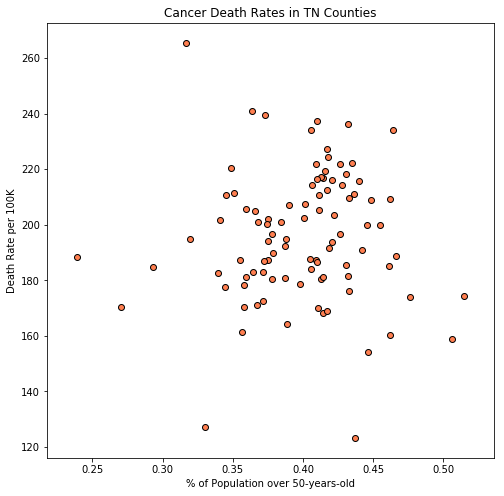

In [58]:
plt.figure(figsize = (8,8))
plt.scatter(pop_and_cancer.percent_pop_over_50_2017, pop_and_cancer.death_rate_per_100K, 
            color = 'coral', edgecolor = 'black')
plt.xlabel('% of Population over 50-years-old')
plt.ylabel('Death Rate per 100K')
plt.title('Cancer Death Rates in TN Counties')
plt.show()

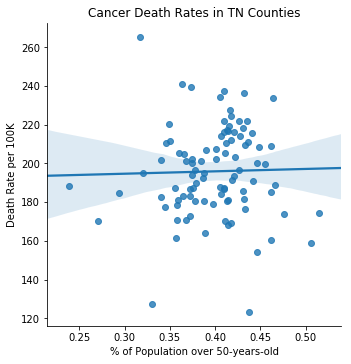

In [73]:
sns.lmplot(x = 'percent_pop_over_50_2017', y = 'death_rate_per_100K', data = pop_and_cancer)
plt.xlabel('% of Population over 50-years-old')
plt.ylabel('Death Rate per 100K')
plt.title('Cancer Death Rates in TN Counties')
plt.show();

#### Create a feature – normalized_hospice_rate – by dividing hospice count by total pop and multiplying by 100K

In [62]:
pop_and_cancer['normalized_hospice_rate'] = pop_and_cancer.hospice_count/pop_and_cancer.pop2017all * 100000

#### Scatterplot of population over 50 vs normalized hospice rate

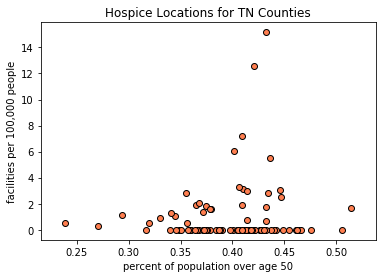

In [64]:
plt.scatter(pop_and_cancer.percent_pop_over_50_2017, pop_and_cancer.normalized_hospice_rate,
            color = 'coral', edgecolor = 'black')
plt.xlabel('percent of population over age 50')
plt.ylabel('facilities per 100,000 people')
plt.title('Hospice Locations for TN Counties')
plt.show();

#### Seaborn boxplot of normalized hospice rates, with nested grouping by the Healthy People cancer goal categories

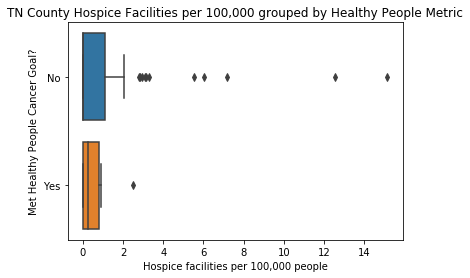

In [79]:
sns.boxplot(x = pop_and_cancer.normalized_hospice_rate, y = pop_and_cancer.healthy_people)
plt.title('TN County Hospice Facilities per 100,000 grouped by Healthy People Metric')
plt.xlabel('Hospice facilities per 100,000 people')
plt.ylabel('Met Healthy People Cancer Goal?')
plt.show();